In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import random
import warnings
warnings.filterwarnings('ignore')

DATASET: https://archive.ics.uci.edu/ml/datasets/online+retail

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.


Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Cleaning

In [6]:
# Finding number of duplicate records
df.duplicated().sum()

5268

In [7]:
# Removing duplicate records
df = df[~df.duplicated()]
df.shape

(536641, 8)

Wkt, InvoiceNo starting with 'C' indicate cancelled transactions. We need to remove them.

In [8]:
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
df = df[df['InvoiceNo'].str.startswith('C')!=True]
df.shape

(527390, 8)

In [10]:
# unique transactions
df.InvoiceNo.nunique()

22064

In [11]:
# No of unique stockids 
df.StockCode.nunique()

4059

In [12]:
# top 10 stock ids that were sold the most
top_stock_ids = df.StockCode.value_counts().head(10)
top_stock_ids

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
84879     1477
22197     1418
22720     1396
21212     1352
22383     1307
Name: StockCode, dtype: int64

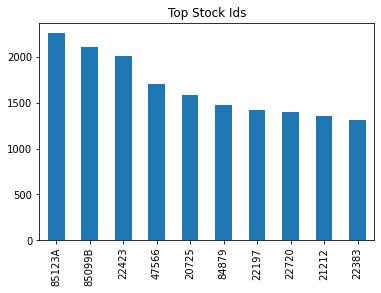

In [13]:
ax = top_stock_ids.plot.bar(title="Top Stock Ids")

In [14]:
df.Quantity.describe()

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

We see that this column has -ve values as well... These indicate returned or cancelled orders

In [15]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [16]:
df = df[df['Quantity']>=0]
df.shape

(526054, 8)

In [17]:
df.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

In [18]:
df.Country.value_counts()

United Kingdom          481143
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [19]:
country_dist = df.Country.value_counts(normalize=True)
country_dist

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [20]:
# pl = country_dist.plot.bar(title="Country-wise Distribution")

We see that more than 90% have country as UK. This is because the retailer is UK based.

For our project, we will combine countries other than UK as a single category.

In [21]:
df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)

United Kingdom    0.914627
Others            0.085373
Name: Country, dtype: float64

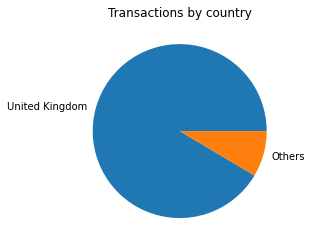

In [22]:
pl = df.Country.value_counts(normalize=True).plot.pie(title="Transactions by country", ylabel="")

In [23]:
# Unique Items
df.Description.nunique()

4077

In [24]:
# df.Description.value_counts()

In [25]:
# top 10 items sold
df.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

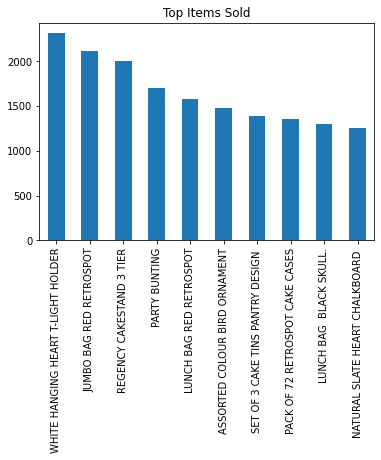

In [26]:
pl = df.Description.value_counts().head(10).plot.bar(title="Top Items Sold")

In [27]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133322
Country             0
dtype: int64

In [28]:
df.CustomerID.nunique()

4339

In [29]:
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [30]:
df = df[~df.CustomerID.isnull()]
df.shape

(392732, 8)

In [31]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [32]:
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                   285
Next Day Carriage         79
Bank Charges              12
High Resolution Image      3
Name: Description, dtype: int64

The above entries are 'Noise' in the Description column

In [33]:
df = df[df['Description'].str.istitle()!=True]
df.shape

(392353, 8)

## EDA

In [35]:
# Creating new columns for analysis
df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


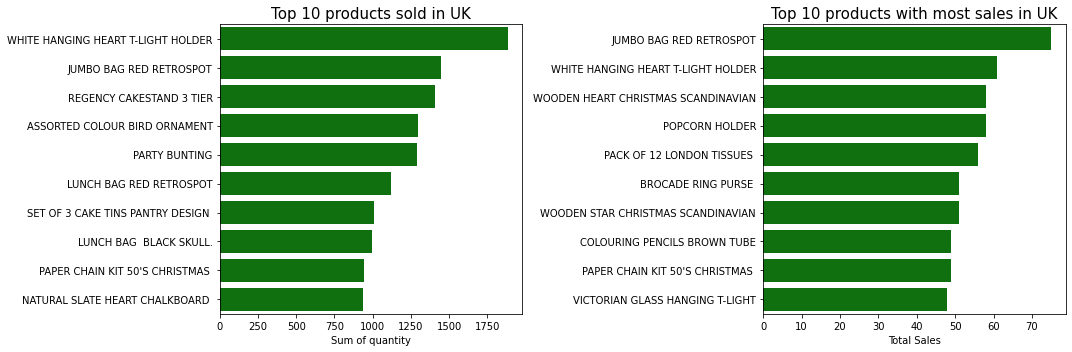

In [37]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='green')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products sold in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

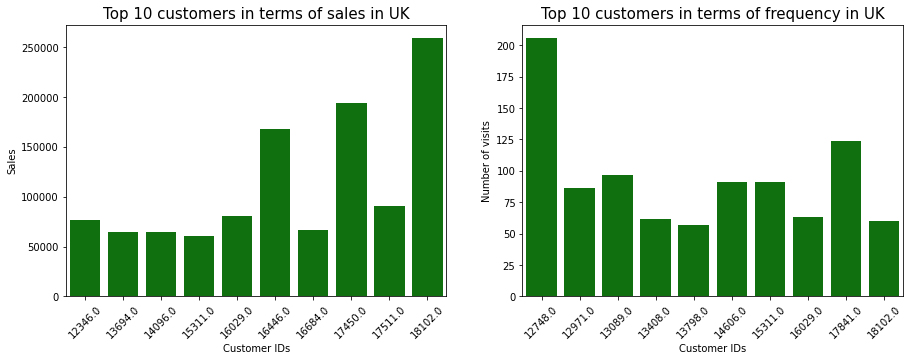

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

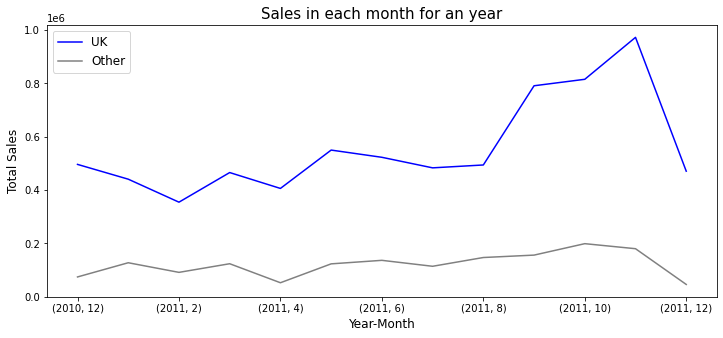

In [39]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

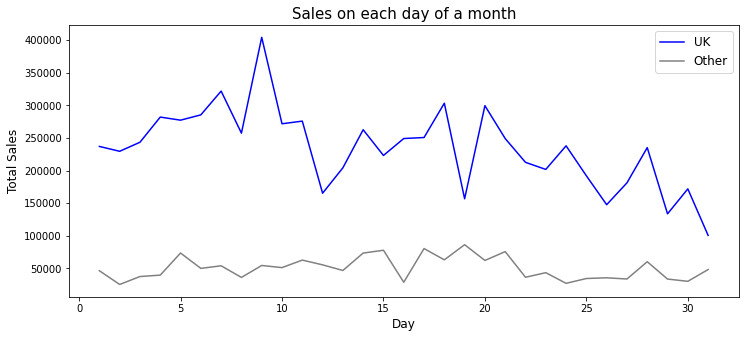

In [40]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['day'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()

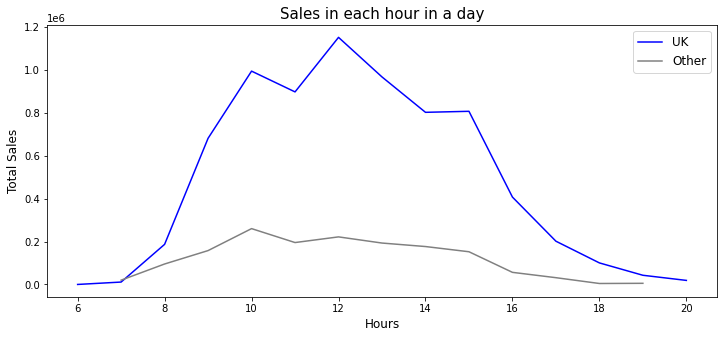

In [41]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()


## RFM Analysis

1. Recency: How recently a customer has made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary Value: How much money a customer spends on purchases.

In [42]:
# copying the data in another df
rfm_df = df.copy()

In [43]:
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


In [44]:
# keeping only desired columns
rfm_df = rfm_df.iloc[:,:9]
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Recency

In [45]:
recency = pd.DataFrame(rfm_df.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [46]:
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency.head()

,CustomerID,InvoiceDate,MaxDate,recency
0,12346.0,2011-01-18,2011-12-09,326
1,12347.0,2011-12-07,2011-12-09,3
2,12348.0,2011-09-25,2011-12-09,76
3,12349.0,2011-11-21,2011-12-09,19
4,12350.0,2011-02-02,2011-12-09,311


In [47]:
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [48]:
monetary = pd.DataFrame(rfm_df.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Frequency

In [49]:
frequency = pd.DataFrame(rfm_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


### Monetary

In [50]:
# Combining Recency, Frequency and Monetary into a single table
rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
5,12352.0,37,7,1665.74
6,12353.0,205,1,89.00
7,12354.0,233,1,1079.40
8,12355.0,215,1,459.40
9,12356.0,23,3,2811.43


In [51]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4335 non-null   float64
 1   recency     4335 non-null   int64  
 2   frequency   4335 non-null   int64  
 3   monetary    4335 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.6 KB


In [52]:
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,CustomerID,recency,frequency,monetary
count,4335.000000,4335.000000,4335.000000,4335.000000
mean,15298.780392,93.178316,4.257670,2037.461814
std,1722.075082,100.168279,7.657456,8966.210388
min,12346.000000,1.000000,1.000000,0.000000
25%,13811.500000,18.000000,1.000000,306.290000
50%,15297.000000,51.000000,2.000000,668.430000
75%,16778.500000,143.000000,5.000000,1651.605000
90%,17685.600000,264.000000,9.000000,3626.402000
95%,17984.300000,312.000000,13.000000,5744.689000
99%,18225.660000,369.000000,30.000000,19465.318400


#### How we will use these RFM values:

1. Using RFM, we'll categorize the customer into different category according to their value.
2. For this first we categorize the R,F,M values into the labels 1-5. 1 being the low and 5 being the higest. Here we make cuts at 25%, 50%, 75% and 90% to distribute them into 5 categories.
3. We then sum these values for each row and label the column 'score'.
4. After that we make cuts on 'score' at 25%, 50%, 75% and 90% to categorize the customers into Bad, Bronze, Silver, Gold and Platinum.

In [53]:
# Labeling RFM values. The better the RFM value higher the number

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,18,51,143,264,375], labels=[5,4,3,2,1])
rfm['recency_score'] = rfm['recency_score'].astype('int')

rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,306,667,1650,3614,290000], labels=[1,2,3,4,5])
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,5,9,210], labels=[1,2,3,4,5])
rfm['frequency_score'] = rfm['frequency_score'].astype('int')

In [55]:
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,monetary_score,frequency_score
0,12346.0,326,1,77183.60,1,5,1
1,12347.0,3,7,4310.00,5,5,4
2,12348.0,76,4,1797.24,3,4,3
3,12349.0,19,1,1757.55,4,4,1
4,12350.0,311,1,334.40,1,2,1


In [56]:
def score_rfm(x) : return (x['recency_score']) + (x['monetary_score'] + (x['frequency_score']))

rfm['score'] = rfm.apply(score_rfm, axis=1 )
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,monetary_score,frequency_score,score
0,12346.0,326,1,77183.60,1,5,1,7.0
1,12347.0,3,7,4310.00,5,5,4,14.0
2,12348.0,76,4,1797.24,3,4,3,10.0
3,12349.0,19,1,1757.55,4,4,1,9.0
4,12350.0,311,1,334.40,1,2,1,4.0


In [57]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    4335.000000
mean        8.414533
std         3.308478
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
95%        15.000000
99%        15.000000
max        15.000000
Name: score, dtype: float64

In [58]:
rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,monetary_score,frequency_score,score,customer_type
0,12346.0,326,1,77183.60,1,5,1,7.0,Bronze
1,12347.0,3,7,4310.00,5,5,4,14.0,Platinum
2,12348.0,76,4,1797.24,3,4,3,10.0,Silver
3,12349.0,19,1,1757.55,4,4,1,9.0,Silver
4,12350.0,311,1,334.40,1,2,1,4.0,Bad


In [59]:
rfm.customer_type.value_counts(normalize=True)*100

Bad         33.217993
Silver      27.773933
Bronze      19.815456
Gold        10.357555
Platinum     8.835063
Name: customer_type, dtype: float64

In [60]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         33.0
Silver      28.0
Bronze      20.0
Gold        10.0
Platinum     9.0
Name: customer_type, dtype: float64

#### Inferences:

- We see that around 9% of customers are in Platinum category. Their score is best in all the three: Recency, Monetary and Frequency. Platimun and Gold Category customers(19%) are loyal to the business.
- Business can target the Silver category customers to convert them into Gold category by rolling out offers and new strategies.
- Bad category customers aren't of much importance to the business as they don't bring in much profit but still attempts can be made to engage them more with the business and persuading them to purchase more and often.

In [61]:
# looking at the RFM values for each of the categories
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
Bad,188.0,1.0,297.0
Bronze,79.0,2.0,710.0
Silver,44.0,4.0,1416.0
Gold,20.0,7.0,3232.0
Platinum,10.0,19.0,12111.0


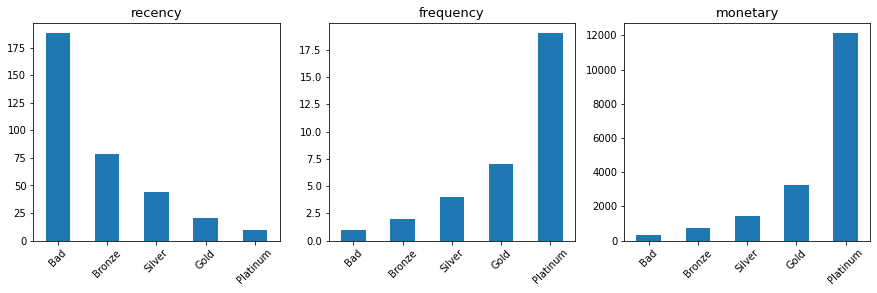

In [62]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar')
    plt.title('{}'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

### k-Means Clustering

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [63]:
kmeans_df = rfm.copy()
kmeans_df.head()

,CustomerID,recency,frequency,monetary,recency_score,monetary_score,frequency_score,score,customer_type
0,12346.0,326,1,77183.60,1,5,1,7.0,Bronze
1,12347.0,3,7,4310.00,5,5,4,14.0,Platinum
2,12348.0,76,4,1797.24,3,4,3,10.0,Silver
3,12349.0,19,1,1757.55,4,4,1,9.0,Silver
4,12350.0,311,1,334.40,1,2,1,4.0,Bad


In [64]:
kmeans_df = kmeans_df.iloc[:,:4]
kmeans_df.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


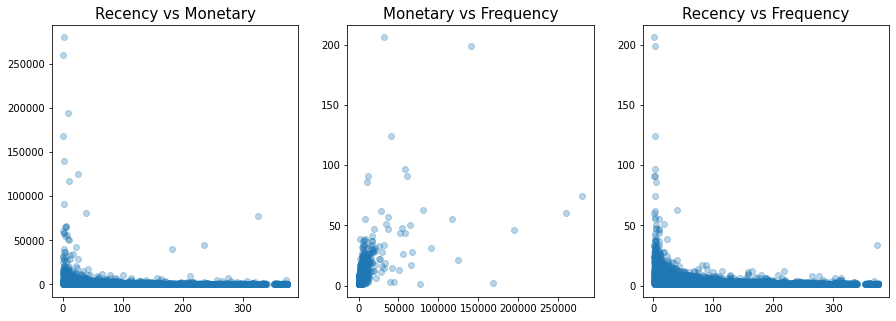

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(kmeans_df.recency, kmeans_df.monetary, alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.subplot(1,3,2)
plt.scatter(kmeans_df.monetary, kmeans_df.frequency, alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(kmeans_df.recency, kmeans_df.frequency, alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.show()

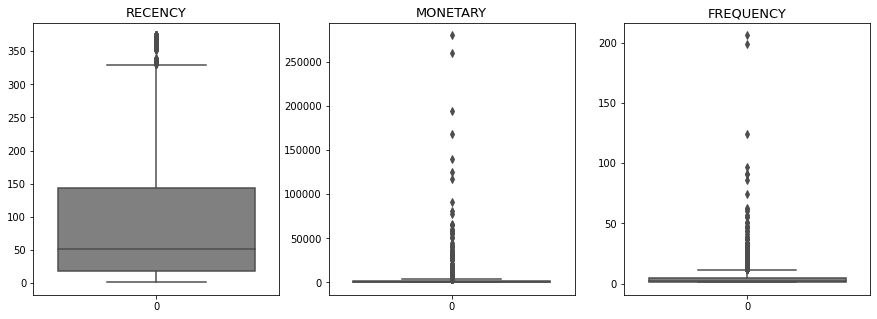

In [66]:
# distribution of the variables

column = ['recency','monetary','frequency']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(kmeans_df[j], color='grey')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [67]:
# Removing outliers for Recency
Q1 = kmeans_df.recency.quantile(0.05)
Q3 = kmeans_df.recency.quantile(0.95)
IQR = Q3 - Q1
kmeans_df = kmeans_df[(kmeans_df.recency >= Q1 - 1.5*IQR) & (kmeans_df.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Monetary
Q1 = kmeans_df.monetary.quantile(0.05)
Q3 = kmeans_df.monetary.quantile(0.95)
IQR = Q3 - Q1
kmeans_df = kmeans_df[(kmeans_df.monetary >= Q1 - 1.5*IQR) & (kmeans_df.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = kmeans_df.frequency.quantile(0.05)
Q3 = kmeans_df.frequency.quantile(0.95)
IQR = Q3 - Q1
kmeans_df = kmeans_df[(kmeans_df.frequency >= Q1 - 1.5*IQR) & (kmeans_df.frequency <= Q3 + 1.5*IQR)]

In [68]:
# resetting the index
kmeans_df = kmeans_df.reset_index(drop=True)
kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4258 non-null   float64
 1   recency     4258 non-null   int64  
 2   frequency   4258 non-null   int64  
 3   monetary    4258 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [69]:
kmeans_df.sample(10)

,CustomerID,recency,frequency,monetary
3618,17388.0,78,4,1259.56
1187,13989.0,66,2,1266.08
1466,14389.0,66,2,1043.46
4186,18190.0,193,2,284.46
3263,16881.0,67,1,432.00
1121,13893.0,298,1,821.10
3621,17394.0,220,1,203.87
1228,14047.0,9,5,1308.61
3400,17070.0,115,1,304.24
3796,17640.0,87,1,621.66


In [70]:
# removing CustomerID as it won't be used in making cluster
kmeans_df = kmeans_df.iloc[:,1:]
kmeans_df.head()

,recency,frequency,monetary
0,3,7,4310.00
1,76,4,1797.24
2,19,1,1757.55
3,311,1,334.40
4,37,7,1665.74


In [71]:
# scaling the variables and store it in different df
standard_scaler = StandardScaler()
kmeans_df_norm = standard_scaler.fit_transform(kmeans_df)

In [72]:
# converting it into dataframe
kmeans_df_norm = pd.DataFrame(kmeans_df_norm)
kmeans_df_norm.columns = ['recency','frequency','monetary']
kmeans_df_norm.head()

,recency,frequency,monetary
0,-0.912524,0.877380,1.680360
1,-0.184234,0.098368,0.272665
2,-0.752899,-0.680645,0.250430
3,2.160262,-0.680645,-0.546845
4,-0.573321,0.877380,0.198997


- Initially, let's take k=5 as we divided the customers into 5 categories using RMF score.

In [73]:
from sklearn.cluster import KMeans

In [74]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(kmeans_df_norm)

KMeans(n_clusters=5)

In [75]:
kmeans_df['clusters'] = model_clus5.labels_
kmeans_df.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,1
1,76,4,1797.24,4
2,19,1,1757.55,0
3,311,1,334.40,2
4,37,7,1665.74,4


In [76]:
kmeans_df.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,55.0,2.0,574.0
1,24.0,11.0,4297.0
2,255.0,1.0,435.0
3,14.0,18.0,8775.0
4,34.0,6.0,2014.0


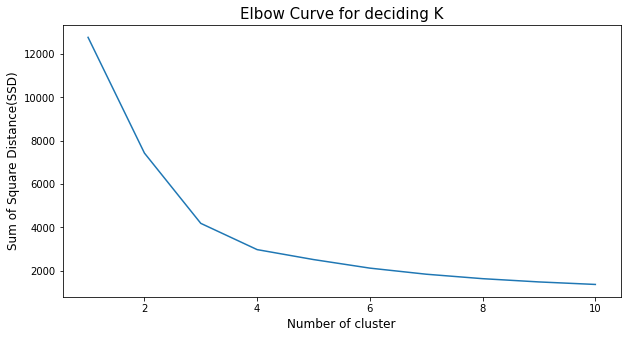

In [77]:
# Elbow-curve/SSD
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(kmeans_df_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [78]:
# Silhouette analysis
from sklearn.metrics import silhouette_score

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(kmeans_df_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(kmeans_df_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5455948044246844
For n_clusters=3, the silhouette score is 0.5108316295787633
For n_clusters=4, the silhouette score is 0.48549468163731985
For n_clusters=5, the silhouette score is 0.4417329061527248
For n_clusters=6, the silhouette score is 0.41675985843266183
For n_clusters=7, the silhouette score is 0.417580079847707
For n_clusters=8, the silhouette score is 0.39637533553272813
For n_clusters=9, the silhouette score is 0.382728043741281
For n_clusters=10, the silhouette score is 0.3738907858449387


- From the elbow curve we observe the elbow at cluster 3 and cluster 4.
- Also from Silhouette analysis we see the value is better when number of cluster will be 3 rather than 4.
- So we now categorize the data into 3 clusters and check their RFM values and its distribution.

In [79]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, init= 'k-means++')
model_clus3.fit(kmeans_df_norm)

KMeans(n_clusters=3)

In [80]:
model_clus3.labels_

array([2, 0, 0, ..., 0, 2, 0])

In [81]:
kmeans_df['clusters'] = model_clus3.labels_
kmeans_df.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,2
1,76,4,1797.24,0
2,19,1,1757.55,0
3,311,1,334.40,1
4,37,7,1665.74,0


In [82]:
kmeans_df.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,46.0,3.0,1015.0
1,249.0,1.0,435.0
2,21.0,12.0,5412.0


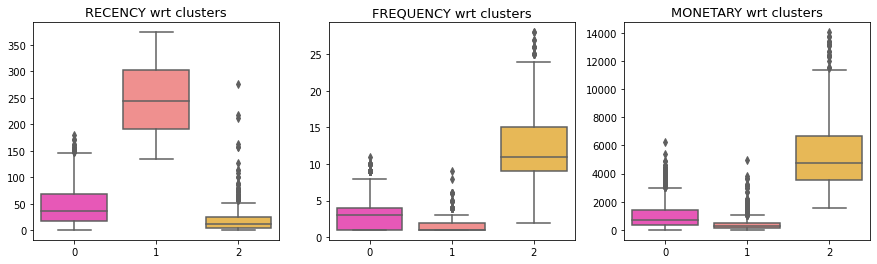

In [83]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=kmeans_df[j], x=kmeans_df['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()


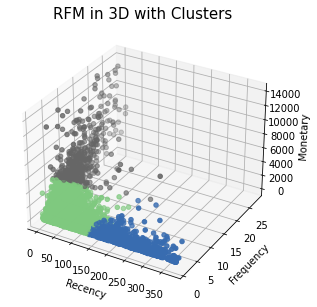

In [84]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(kmeans_df.recency, kmeans_df.frequency, kmeans_df.monetary, c=kmeans_df.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

- Grey points is the group of customers whose Recency is high, Frequency is low and Monetary value is also low.
- Green points are the group of customers whose Recency is low, Frequency is better than grey ones and Monetary is good.
- Blue points are the group of customers whose Recency is low(that is good), Frequency is better than the other two and Monetary is high.

### Prediction

In [85]:
test_row = rfm_df.sample(1)
test_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
44926,540247,20785,FUSCHIA RETRO BAR STOOL,1,2011-01-05 15:56:00,39.95,15464.0,United Kingdom,39.95


In [86]:
test_cust_id = test_row['CustomerID'].iloc[0]
# test_idd = pd.DataFrame(test_cust_id)
test_cust_id

15464.0

In [87]:
# recency_test = pd.DataFrame(test_row['InvoiceDate'])
test_date = pd.to_datetime(test_row['InvoiceDate']).dt.date
recency_test = pd.DataFrame(test_date, columns=['InvoiceDate'])
recency_test['MaxDate'] = rfm_df[rfm_df['CustomerID'] == test_cust_id]['InvoiceDate'].max()
recency_test['recency'] = (recency_test['MaxDate'] - pd.to_datetime(recency_test['InvoiceDate'])).dt.days + 1
recency_test.head()

,InvoiceDate,MaxDate,recency
44926,2011-01-05,2011-01-05 15:56:00,1


In [88]:
mone = rfm_df[rfm_df['CustomerID'] == test_cust_id]['Amount'].sum()
recency_test['monetary'] = mone

In [89]:
rfm_df['CustomerID']
freq = rfm_df[rfm_df['CustomerID'] == test_cust_id]['InvoiceNo'].nunique()
recency_test['freq'] = freq
recency_test

,InvoiceDate,MaxDate,recency,monetary,freq
44926,2011-01-05,2011-01-05 15:56:00,1,1044.65,1


In [90]:
recency_test.drop(['InvoiceDate', 'MaxDate'], inplace=True, axis=1)

In [91]:
recency_test

,recency,monetary,freq
44926,1,1044.65,1


In [92]:
standard_scaler = StandardScaler()
kmeans_df.append(recency_test)
recency_test_norm = standard_scaler.fit_transform(kmeans_df.iloc[:,:-1])
# recency_test_norm
p1 = recency_test_norm[-1]
p1

array([-0.51346108, -0.16130326,  0.29509649])

In [93]:
model_clus3.cluster_centers_

array([[-0.47893397, -0.13954681, -0.16523818],
       [ 1.53965868, -0.55606152, -0.49044467],
       [-0.72884744,  2.29459743,  2.2978573 ]])

In [94]:
dists=[]

for el in model_clus3.cluster_centers_:
    dist = np.linalg.norm(p1-el)
    dists.append(dist)
dists

[0.4621401028989239, 2.233430038907723, 3.176301369219905]

In [95]:
min_dist = min(dists)
min_dist

0.4621401028989239

In [96]:
if(min_dist == dists[0]):
    print("Bronze Category: More Engagement needed!!")
elif(min_dist == dists[1]):
    print("Silver Category: Offer more deals!!")
else:
    print("Gold Category: Offer seamless experience!!")

Bronze Category: More Engagement needed!!
